In [3]:
import aotools
import numpy as np
import matplotlib.pyplot as plt


r0 = 0.1 #Fried parameter [m] - typically 5-10 cm for vertical viewing 
N = 100 #pixel number
delta = 0.01 #length scale of pixels [m]
L0 = 100.0 #Length of outer scale [m] - typically 100 m
l0 = 0.01 #Length of inner scale [m] - typically 1-100 mm

set_number = 100

ps = [aotools.turbulence.phasescreen.ft_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None) for i in range(set_number)]

sh_ps = [aotools.turbulence.phasescreen.ft_sh_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None) for i in range(set_number)]


In [4]:
print(ps[0])

[[-4.15395414 -3.83376213 -3.28798458 ... -3.34838528 -3.76471681
  -4.1537597 ]
 [-3.94667371 -3.68234516 -3.07760979 ... -3.339844   -3.60948272
  -3.80791749]
 [-3.56839507 -3.31492032 -3.00964587 ... -3.64829058 -3.66491698
  -3.61926671]
 ...
 [-2.99966579 -2.57131997 -2.55173593 ... -2.86864176 -3.16401261
  -3.4187215 ]
 [-3.65529649 -3.11247183 -2.83502681 ... -3.06310684 -3.29737318
  -3.77215009]
 [-4.0883333  -3.73510252 -3.23830123 ... -3.31389789 -3.41224496
  -3.93861011]]


In [74]:
del_r = np.arange(1,N) * delta

In [75]:
vk = aotools.turbulence.slopecovariance.structure_function_vk(del_r, r0, L0)

sf = [aotools.turbulence.calculate_structure_function(phase_screen, nbOfPoint=N, step=None) for i, phase_screen in enumerate(ps)]

sh_sf = [aotools.turbulence.calculate_structure_function(sh_phase_screen, nbOfPoint=N, step=None) for i, sh_phase_screen in enumerate(sh_ps)]


In [76]:
sf = np.asarray(sf)
sh_sf = np.asarray(sh_sf)

av_sf = sf.mean(axis = 0)
av_sh_sf = sh_sf.mean(axis = 0)

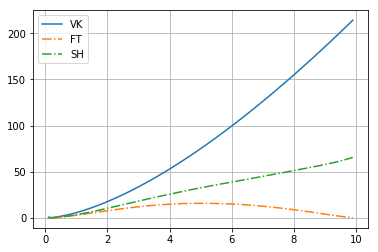

In [77]:
plt.figure()
plt.plot(abs(del_r)/r0 ,vk, label = 'VK') 
plt.plot(abs(del_r)/r0 ,av_sf,'-.',label = 'FT')
plt.plot(abs(del_r)/r0 ,av_sh_sf ,'-.',label = 'SH')
plt.legend()
plt.grid()
plt.show()